# Niclas Svanström Mossberg
## Inlämning 2

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [3]:
def get_iris_dataset():
    iris_data=load_iris()
    iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
    return iris_df

In [4]:
iris_data = get_iris_dataset()

In [5]:
def get_special_iris_dataset():
    special_iris_data = pd.read_csv('special_iris.csv')
    return special_iris_data

In [6]:
special_iris_data = get_special_iris_dataset()

# Analys av dataset:

### Antalet datapunkter:

In [7]:
print(f"Vanliga iris datasetet har {iris_data.shape[0]}st datapunkter")

Vanliga iris datasetet har 150st datapunkter


### Distribution av attribut:

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

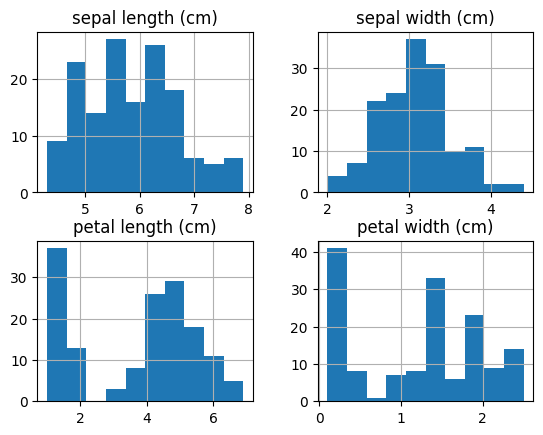

In [8]:
iris_data.hist()

In [9]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Vi ser medelvärdet för varje attribut, standard deviation, minsta värdet, största värdet.

## Förklara K-means:

### K-means algoritmen används för att dela in data i ett angivet antal kluster baserat på likheter mellan dataobjekten. Algoritmen slumpar fram klustercenter så tilldelas varje dataobjekt det klustercenter som den ligger närmst. När detta är gjort så uppdateras sedan klustercentret baserat på medelvärdet av alla dataobjekt som blivit tilldelade till den. Så görs det om och om igen tills att det inte längre förändras eller att ett förbestämt iterationer uppnåtts.

In [10]:
sepal_len = iris_data['sepal length (cm)']
sepal_wid = iris_data['sepal width (cm)']
petal_len = iris_data['petal length (cm)']
petal_wid = iris_data['petal width (cm)']

In [11]:
def show_plots(x,y):
    plt.scatter(x, y)
    plt.show()

In [12]:
def elbow_method(x,y):
    data = list(zip(x, y))
    sse = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1,11), sse, 'o-')
    plt.xlabel('Antal kluster')
    plt.ylabel('SSE')
    plt.title('Elbow-metoden för iris-datasetet')
    plt.show()

In [13]:
def show_cluster(x,y,k):
    data = list(zip(x, y))
    kmeans = KMeans(n_clusters=k, n_init="auto", max_iter=300)
    kmeans.fit(data)
    kmeans_center = kmeans.cluster_centers_
    print(kmeans_center)
    print(f"Antal iterationer: {kmeans.n_iter_}")
    plt.scatter(x, y, c=kmeans.labels_)
    plt.scatter(kmeans_center[:,0],kmeans_center[:,1], marker ='*', c="black")
    plt.show()

### I nedanstående kod så kommer jag att kontrollera iris_data med olika kombinationer av två attribut.
### Det kommer bli sex olika tester där jag först ritar ut datan och ska komma fram till hur många kluster jag tycker är lämpligt, till hjälp har jag sedan elbow metoden för att backa upp min hypotes.
### Min filosofi med klustring är att om det redan finns ett givet kluster så vill man dela upp resterande data så det blir ungefär lika stora delar som det givna.

### Om vi börjar kolla på sepal length och sepal width

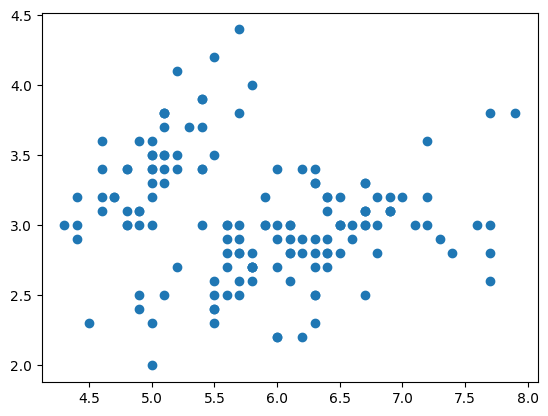

In [14]:
show_plots(sepal_len,sepal_wid)

#### I detta fall så ser allting väldigt utspritt ut, jag väljer att köra fyra stycken kluster, men kontrollerar även med elbow-metoden nedanför

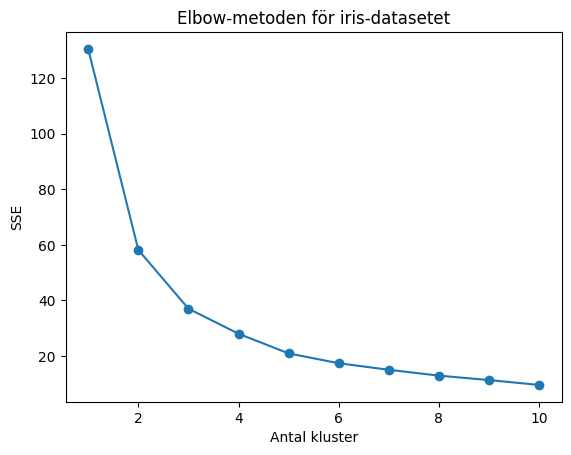

In [15]:
elbow_method(sepal_len,sepal_wid)

#### I metoden ovan så ser vi att den börjar jämna ut kurvan mellan tre och fyra, så att välja fyra kluster är klokt.

[[6.01129032 2.80806452]
 [4.792      2.896     ]
 [7.03225806 3.08709677]
 [5.1875     3.6375    ]]
Antal iterationer: 5


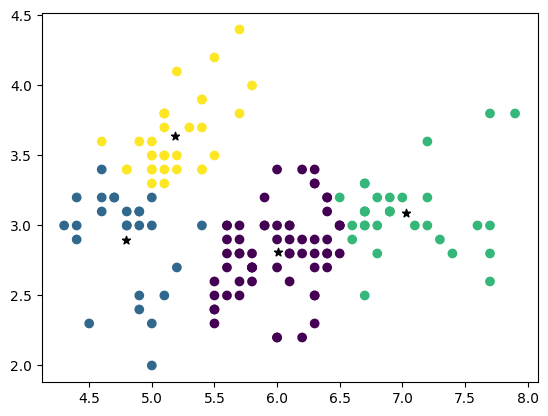

In [16]:
show_cluster(sepal_len,sepal_wid,4)

### Om vi nu kollar på sepal length och petal length

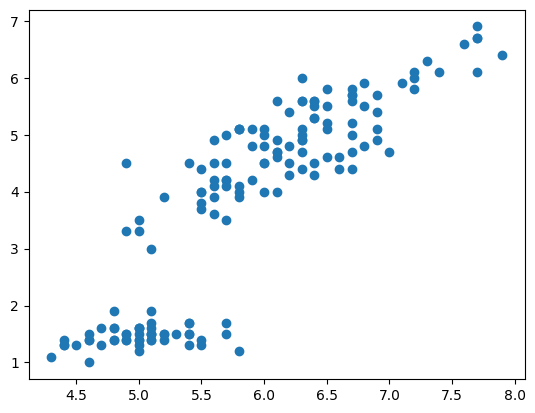

In [17]:
show_plots(sepal_len,petal_len)

#### I detta fall så är det ett givet kluster nere till vänster, jag väljer tre stycken kluster, men kontrollerar även med elbow-metoden nedanför

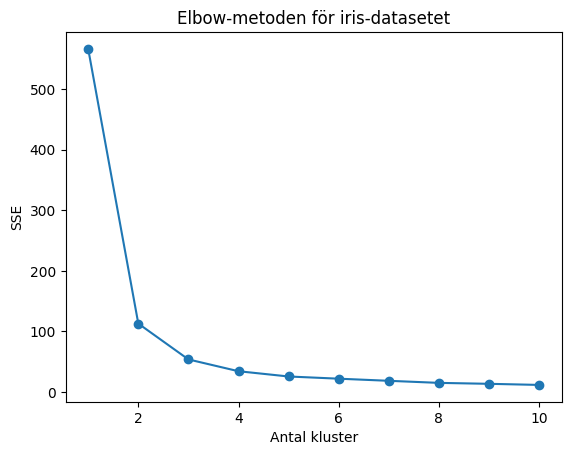

In [18]:
elbow_method(sepal_len,petal_len)

#### I metoden ovan så ser vi att den börjar jämna ut kurvan mellan två och tre, men framförallt vid nummer tre.

[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]
Antal iterationer: 4


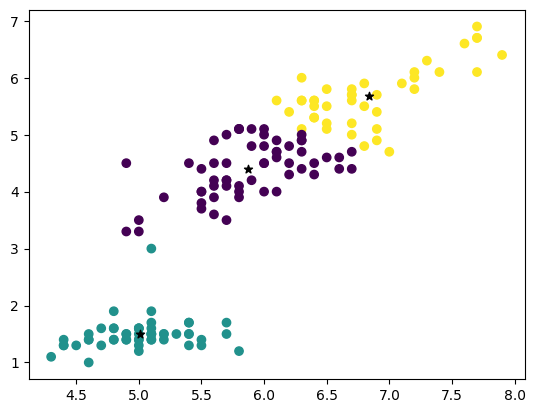

In [19]:
show_cluster(sepal_len,petal_len,3)

### Om vi nu kollar på sepal length och petal width

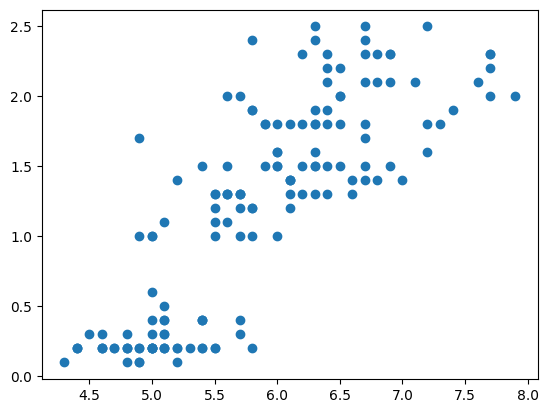

In [20]:
show_plots(sepal_len,petal_wid)

#### I detta fall så blir det lite mer utspritt igen men det är en ganska tydlig grup nere till vänster, jag väljer att köra tre stycken kluster, men kontrollerar även med elbow-metoden nedanför

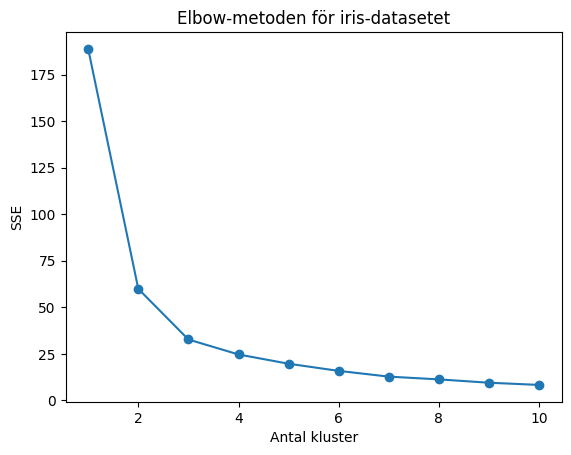

In [21]:
elbow_method(sepal_len,petal_wid)

#### I metoden ovan så ser vi att den börjar jämna ut kurvan mellan två och tre, men framförallt vid nummer tre.

[[6.85714286 2.01190476]
 [5.00555556 0.3037037 ]
 [5.89259259 1.46296296]]
Antal iterationer: 10


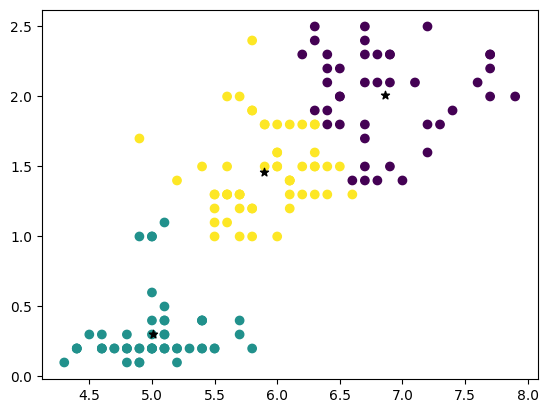

In [22]:
show_cluster(sepal_len,petal_wid,3)

### Om vi nu kollar på sepal width och petal length

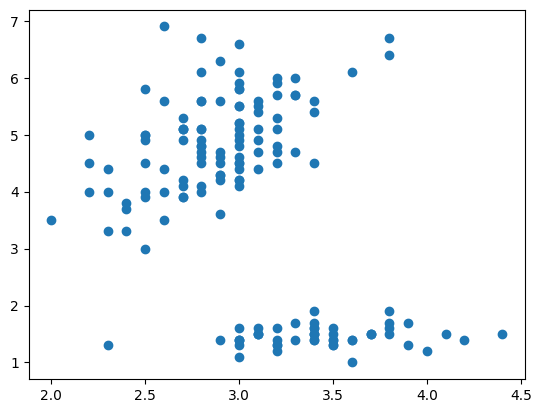

In [23]:
show_plots(sepal_wid,petal_len)

#### I detta fall så blir det lite mer utspritt igen men det är en ganska tydlig grup nere till höger, jag väljer att köra tre stycken kluster, men kontrollerar även med elbow-metoden nedanför

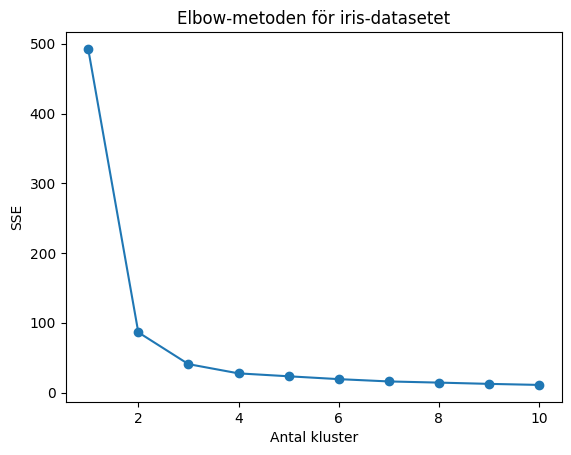

In [24]:
elbow_method(sepal_wid,petal_len)

#### I metoden ovan så ser vi att den börjar jämna ut kurvan mellan två och tre, men framförallt vid nummer tre. Men det hade även kunnat vara två kluster

[[2.75087719 4.32807018]
 [3.03255814 5.67209302]
 [3.428      1.462     ]]
Antal iterationer: 8


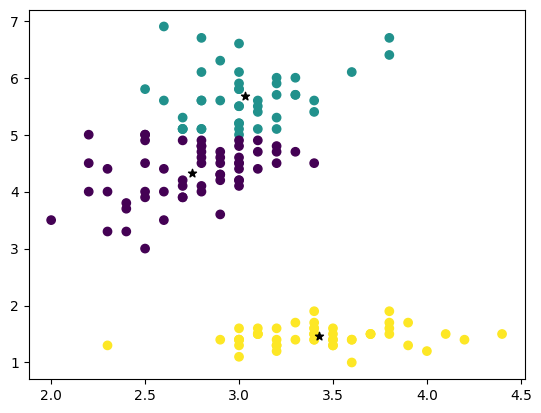

In [25]:
show_cluster(sepal_wid,petal_len,3)

### Om vi nu kollar på sepal width och petal width

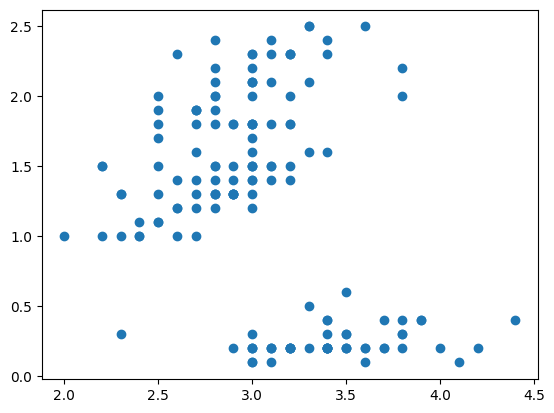

In [26]:
show_plots(sepal_wid,petal_wid)

#### I detta fall så blir det lite mer utspritt men ganska lik det förra testet, jag håller mig till tre kluster

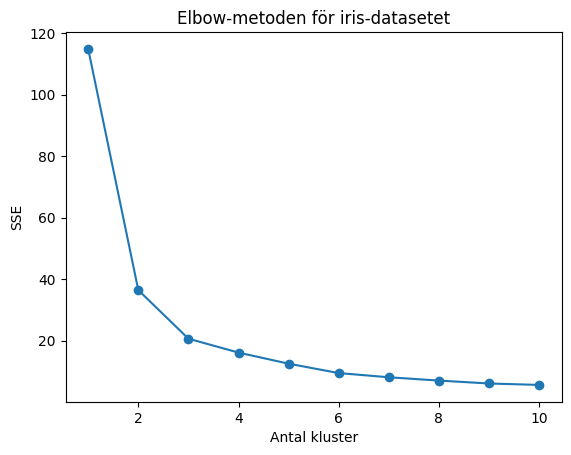

In [27]:
elbow_method(sepal_wid,petal_wid)

#### Precis som med exemplet ovan så börjar den plana ut vid två men framförallt vid tre.

[[2.70754717 1.30943396]
 [3.45102041 0.24489796]
 [3.04166667 2.05208333]]
Antal iterationer: 5


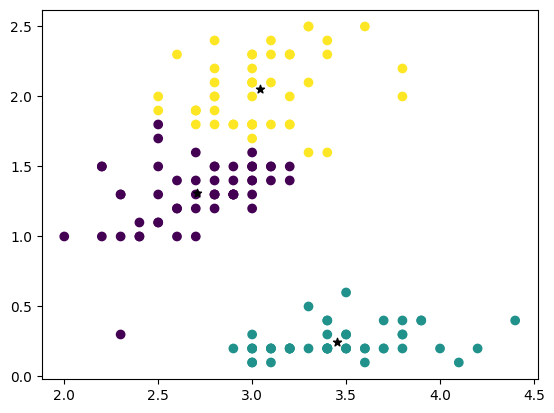

In [28]:
show_cluster(sepal_wid,petal_wid,3)

### Om vi nu slutligen kollar på petal length och petal width

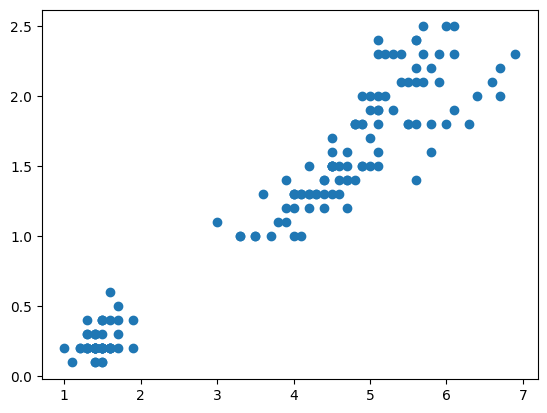

In [29]:
show_plots(petal_len,petal_wid)

#### I detta fall så blir det väldigt likt sepal length och sepal width fast nu är allting ännu mer klustrat. Detta måste vara den bästa hitils, jag väljer tre även här.

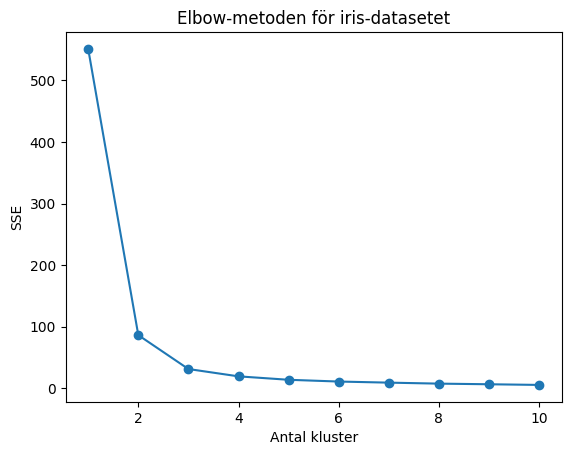

In [30]:
elbow_method(petal_len,petal_wid)

#### Precis som med exemplet ovan så börjar den plana ut vid två men framförallt vid tre.

[[1.462      0.246     ]
 [4.29259259 1.35925926]
 [5.62608696 2.04782609]]
Antal iterationer: 7


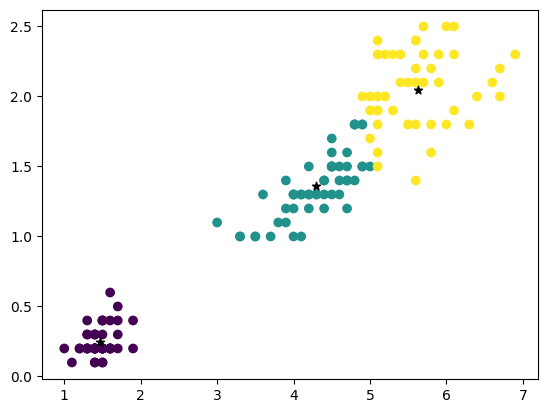

In [31]:
show_cluster(petal_len,petal_wid,3)

### Efter att ha gått igenom alla möjliga kombinationer så tycker jag att petal length och petal width är dom bästa att testa för at få ut bäst data. Detta för att den har ett naturligt val av kluster eftersom att alla punkter är väldigt centrerade.
### Även sepal length och sepal width gav ett liknande alternativ som ger bra info då det även var centrerade punkter.

## Experimentera med parametrar:

### Efter att ha exprimenterat runt lite med olika värden i kmeans algoritmen så upptäckte jag följande:

### max_iter - här bestäms hur många iterationer som ska köras, eftersoma att kmeans försöker hitta bästa stället att initsiera centroiderna sen ska den ju beräkna om dessa med nya beräkningar så kommer värdena variera enormt om man t.ex. bara sätter max_iter = 1. Den behöver ju köra några varv för att ta reda på bästa klustring.

### random_state - kmeans initierar ju vad den tror är bästa start för centroiderna detta gör så att man kan få olika data när man kör det flera gånger men med denna så kan man själv bestämma vart dom ska börja och därmed kommer resultatet vara repeterbart.

### n_init - denna tycker jag inte gjorde någon märkbar skillnad utöver att det visades felmeddelanden om man inte hade den med i algoritmen och satte som 'auto', kanske är just detta dataset som man inte märker så stor skillnad.

## VG delen

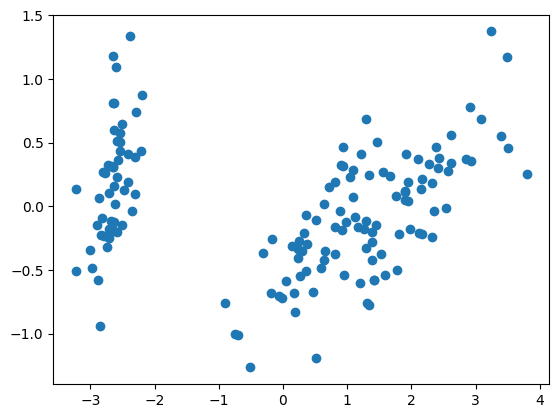

In [32]:
pca_transformation(iris_data)
x_data = pca_transformation(iris_data)['principal component 1']
y_data = pca_transformation(iris_data)['principal component 2']

show_plots(x_data,y_data)

### Då vi har en klustring till vänster redan och ganska utspridda punkter till höger så tycker jag att precis som många av exemplen med två värden att tre stycken kluster är lämpligt.

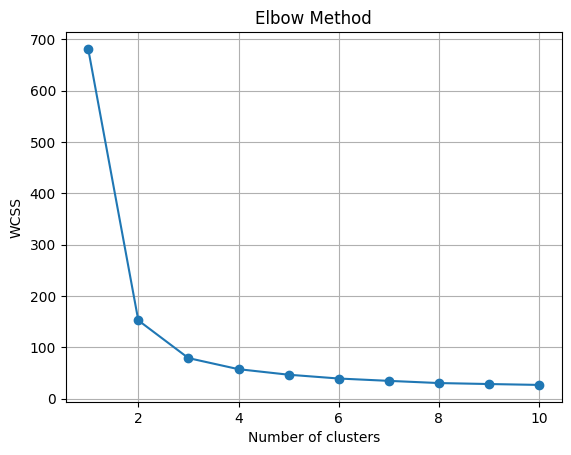

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

### Efter kontroll av elbow-metoden så finner jag att tre kluster är ett bra antal.

c:\Users\Nicla\OneDrive\Dokument\jupyter\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


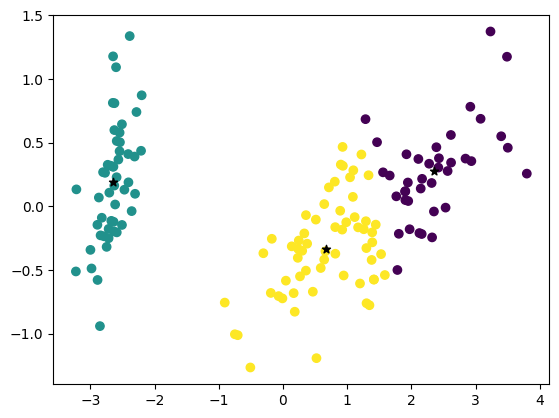

In [34]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init='auto')
kmeans.fit(iris_data)

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(iris_data)
centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black')

plt.show()


## Precis som i samtliga fall utom ett bland testen där enbart två attribut testades så är tre kluster vad jag anser vara ett bra antal

# VG del 2

Special iris datasetet har 1500000st datapunkter
Special iris datasetet har 8st attribut


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>,
        <Axes: title={'center': 'petal length (cm)'}>],
       [<Axes: title={'center': 'petal width (cm)'}>,
        <Axes: title={'center': 'extra sepal length'}>,
        <Axes: title={'center': 'extra sepal width'}>],
       [<Axes: title={'center': 'extra petal length'}>,
        <Axes: title={'center': 'extra petal width'}>, <Axes: >]],
      dtype=object)

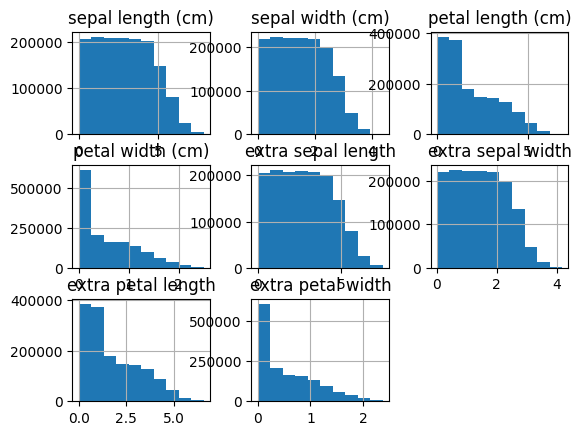

In [35]:
print(f"Special iris datasetet har {special_iris_data.shape[0]}st datapunkter")
print(f"Special iris datasetet har {special_iris_data.shape[1]}st attribut")
special_iris_data.hist()

In [36]:
%%time
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init='auto')
kmeans.fit(iris_data)
print(f"Antal iterationer: {kmeans.n_iter_}")

Antal iterationer: 5
CPU times: total: 0 ns
Wall time: 3 ms


In [37]:
%%time
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init='auto')
kmeans.fit(special_iris_data)
print(f"Antal iterationer: {kmeans.n_iter_}")

Antal iterationer: 8
CPU times: total: 1.39 s
Wall time: 419 ms


### Ovan så testar jag exakt samma värden i algoritmen för att jämföra tiden det tar. Och efter att ha kört igång båda tills dom landade på lika många iterationer gjorda så kan man se att det tar betydlig längre tid för special_iris. Även så verkar den ha blivit mer krävande på CPU'n.
### Detta beroende på att det är ju en så otroligt mycket större mängd data som den behöver gå igenom. Bara genom att jämföra datapunkter så har special_iris 10000 gånger så mycket fler än iris_data och sen har den ju även dubbelt så många attribut.